In [6]:
%load_ext autoreload
%autoreload 2

In [75]:
import numpy as np
from error_algorithms import IoU
from error_algorithms import segmentation_accuracy
from error_algorithms import centroid_distances
from error_algorithms import ignore_duplicates
import tifffile
import matplotlib.pyplot as plt
import os
import sys
from PIL import Image

# 100x

In [126]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/superres/first_trial/omnipose_training/pmc_0.0655/test"
outlist = []
nearlist = []
distlist = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    seg = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    width = mask.shape[1]//40
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        segj = seg[:,width*j:width*(j+1)]
        outlist.append(IoU(maskj,segj))
        nearest, dist = centroid_distances(maskj,segj)
        nearlist.append(nearest)
        distlist.append(dist)

In [127]:
cells100, dists100, duplicates100, indices100 = ignore_duplicates(nearlist, distlist)
dists100 = np.append(dists100, [np.max(dists100)]*duplicates100)
perclist100 = []
for out in outlist:
    for a,b in out:
        perclist100.append(a/b)

In [128]:
percarr100 = np.array(perclist100)
# print(np.argsort(percarr100))
# print(np.max(percarr100))
# plt.plot(np.sort(percarr100))
# plt.show

In [7]:

np.mean(percarr100)

0.9766666666666666


0.9639397500204061

# 60x

In [131]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/superres/first_trial/omnipose_training/pmc_0.1092/test"
outlist = []
nearlist = []
distlist = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    seg = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        segj = seg[:,width*j:width*(j+1)]
        outlist.append(IoU(maskj,segj))
        nearest, dist = centroid_distances(maskj,segj)
        nearlist.append(nearest)
        distlist.append(dist)

In [132]:
cells60, dists60, duplicates60, indices60 = ignore_duplicates(nearlist, distlist)
dists60 = np.append(dists60, [np.max(dists60)]*duplicates60)
perclist60 = []
for out in outlist:
    for a,b in out:
        perclist60.append(a/b)

In [133]:
percarr60 = np.array(perclist60)
# print(np.max(percarr60))
# plt.plot(np.sort(percarr60))
# plt.show()

In [134]:
np.mean(percarr60)

0.9498203313281172

# 40x

In [12]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/superres/first_trial/omnipose_training/pmc_0.1638/test"
outlist = []
idlist = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    seg = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        segj = seg[:,width*j:width*(j+1)]
        outlist.append(IoU(maskj,segj))
        idlist.append(segmentation_accuracy(maskj,[segj],min_dist=int(np.round(np.sqrt(height*width/(100*np.pi)))),lb=0.1,ub=10))

In [13]:
perclist40 = []
for out in outlist:
    for a,b in out:
        perclist40.append(a/b)

In [14]:
idlist40 = np.array(idlist)
percarr40 = np.array(perclist40)
percarr40.shape

(684,)

In [15]:
print(np.mean(idlist40))
np.mean(percarr40)

0.8675


0.9126841740869742

# 60x linear

In [20]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/superres/first_trial/omnipose_training/pmc_0.1092_linear/test"
outlist = []
idlist = []
for i in range(len(os.listdir(directory+"/masks_linear"))):
    mask = np.array(Image.open(directory+"/masks_linear/test_"+str(i).zfill(5)+"_masks.png"))
    seg = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        segj = seg[:,width*j:width*(j+1)]
        outlist.append(IoU(maskj,segj))
        idlist.append(segmentation_accuracy(maskj,[segj],min_dist=int(np.round(np.sqrt(height*width/(100*np.pi)))),lb=0.1,ub=10))

In [21]:
perclist35 = []
for out in outlist:
    for a,b in out:
        perclist35.append(a/b)

In [22]:
idlist35 = np.array(idlist)
percarr35 = np.array(perclist35)
percarr35.shape

(684,)

In [23]:
print(np.mean(idlist35))
np.mean(percarr35)

0.975


0.9180356655249187

# 40x linear

In [110]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/superres/first_trial/omnipose_training/pmc_0.1638_linear/test"
mask_dir = "C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/superres/first_trial/omnipose_training/pmc_0.0655/test/masks"
outlist = []
nearlist = []
distlist = []
masks = []
for i in range(len(os.listdir(mask_dir))):
    mask = np.array(Image.open(mask_dir+"/test_"+str(i).zfill(5)+"_masks.png"))
    seg = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        segj = seg[:,width*j:width*(j+1)]
        outlist.append(IoU(maskj,segj))
        nearest, dist = centroid_distances(maskj,segj)
        nearlist.append(nearest)
        distlist.append(dist)

c:\Users\robho\OneDrive\Desktop\Uni Work\Year 4\project2\error_algorithms.py:153: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  equivalent_value = stats.mode(test_area)[0][0]


In [113]:
cells30, dists30, duplicates30, indices30 = ignore_duplicates(nearlist, distlist)
dists30 = np.append(dists30, [np.max(dists30)]*duplicates30)
perclist30 = []
zeroes = []
for i, out in enumerate(outlist):
    j = 0
    for a,b in out:
        perclist30.append(a/b)
        j += 1
        if a == 0:
            zeroes.append([i,j])

In [114]:
zeroes

[[85, 2], [91, 2], [124, 2]]

In [108]:
percarr30 = np.array(perclist30)
percarr30.shape

(684,)

In [109]:
np.mean(percarr30)

0.7796750311615437

# 60x SRCNN

In [6]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/superres/first_trial/omnipose_training/pmc_0.1092_SR/test"
mask_dir = "C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/superres/first_trial/omnipose_training/pmc_0.0655/test/masks"
outlist = []
idlist = []
for i in range(len(os.listdir(mask_dir))):
    mask = np.array(Image.open(mask_dir+"/test_"+str(i).zfill(5)+"_masks.png"))
    seg = np.array(Image.open(directory+"/segmentations_tiled/mask_"+str(i).zfill(5)+".png"))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        segj = seg[:,width*j:width*(j+1)]
        outlist.append(IoU(maskj,segj))
        idlist.append(segmentation_accuracy(maskj,[segj],min_dist=int(np.round(np.sqrt(height*width/(100*np.pi)))),lb=0.1,ub=10))

c:\Users\robho\OneDrive\Desktop\Uni Work\Year 4\project2\error_algorithms.py:153: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  equivalent_value = stats.mode(test_area)[0][0]


In [7]:
perclist25 = []
for out in outlist:
    for a,b in out:
        perclist25.append(a/b)

In [8]:
idlist25 = np.array(idlist)
percarr25 = np.array(perclist25)
percarr25.shape

(684,)

In [9]:
print(np.mean(idlist25))
np.mean(percarr25)

0.9595833333333332


0.8723052932575477

# 40x SRCNN

In [88]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/superres/first_trial/omnipose_training/pmc_0.1638_SR/test"
mask_dir = "C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/superres/first_trial/omnipose_training/pmc_0.0655/test/masks"
outlist = []
nearlist = []
distlist = []
for i in range(len(os.listdir(mask_dir))):
    mask = np.array(Image.open(mask_dir+"/test_"+str(i).zfill(5)+"_masks.png"))
    seg = np.array(Image.open(directory+"/segmentations_tiled/mask_"+str(i).zfill(5)+".png"))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        segj = seg[:,width*j:width*(j+1)]
        outlist.append(IoU(maskj,segj))
        nearest, dist = centroid_distances(maskj,segj)
        nearlist.append(nearest)
        distlist.append(dist)

c:\Users\robho\OneDrive\Desktop\Uni Work\Year 4\project2\error_algorithms.py:153: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  equivalent_value = stats.mode(test_area)[0][0]


In [89]:
cells20, dists20, duplicates20, indices20 = ignore_duplicates(nearlist, distlist)
dists20 = np.append(dists20, [np.max(dists20)]*duplicates20)
perclist20 = []
for out in outlist:
    for a,b in out:
        perclist20.append(a/b)

In [90]:
percarr20 = np.array(perclist20)
percarr20.shape

(684,)

In [91]:
np.mean(percarr20)

0.9151911488848469

In [105]:
np.argsort(percarr30)

array([312, 427, 292, 200,  45, 384,  56, 192,  46,  17, 430, 282, 428,
       293, 313, 268, 542, 134, 254, 409, 262, 400, 397, 544, 538, 508,
       670, 652, 363, 244, 541, 270, 410, 683, 498, 380, 266,  85, 682,
       658, 255, 111, 210, 671, 386, 135, 654, 524, 678, 674, 118, 259,
       545,  89, 521, 505, 138, 272, 666, 638, 518,  81, 408, 372, 241,
        75, 368, 537, 392, 343, 139, 680, 523, 126, 110, 393, 405, 679,
       483,  77, 389, 675, 258, 251, 515, 239, 629, 391, 265, 220, 672,
       125, 247, 357, 119, 662, 534, 128, 517, 543,  98, 114, 236, 120,
       665, 677, 657, 540, 669, 375, 248, 131, 117, 394, 271, 619, 249,
       358, 378, 528, 109, 235, 412, 536, 396, 404, 490, 123, 403, 137,
       360, 133, 650,  96,  90, 663, 525, 529, 395, 532, 407, 644, 646,
       105, 221, 539, 102, 130, 233, 121, 269,  95, 253, 136, 383,  92,
       641, 115, 238, 402, 497, 240, 520, 655, 639, 535, 401, 647,  88,
       127, 411, 649, 202, 503, 681, 264, 362, 642, 267, 661, 66

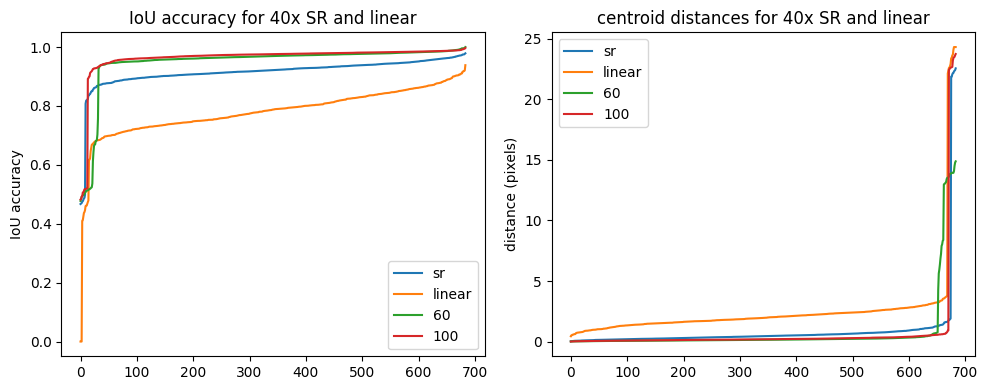

In [135]:
fig, axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(np.sort(percarr20),label = "sr")
axs[0].plot(np.sort(percarr30),label = "linear")
axs[0].plot(np.sort(percarr60),label = "60")
axs[0].plot(np.sort(percarr100),label = "100")
axs[0].set_title("IoU accuracy for 40x SR and linear")
axs[0].set_ylabel("IoU accuracy")
axs[0].legend()
axs[1].plot(np.sort(dists20),label="sr")
axs[1].plot(np.sort(dists30),label="linear")
axs[1].plot(np.sort(dists60),label="60")
axs[1].plot(np.sort(dists100),label="100")
axs[1].set_title("centroid distances for 40x SR and linear")
axs[1].set_ylabel("distance (pixels)")
axs[1].legend()
fig.tight_layout()
plt.show()

In [32]:
xx = [20,25,30,35,40,60,100]
yy1 = [np.mean(percarr20),np.mean(percarr25),np.mean(percarr30),
      np.mean(percarr35), np.mean(percarr40),np.mean(percarr60),
      np.mean(percarr100)]
yerr1 = [np.std(percarr20),np.std(percarr25),np.std(percarr30),
       np.std(percarr35),np.std(percarr40),np.std(percarr60),
       np.std(percarr100)]
yy2 = [np.mean(idlist20),np.mean(idlist25),np.mean(idlist30),
       np.mean(idlist35),np.mean(idlist40),np.mean(idlist60),
       np.mean(idlist100)]
yerr2 = [np.std(idlist20),np.std(idlist25),np.std(idlist30),
       np.std(idlist35),np.std(idlist40),np.std(idlist60),
       np.std(idlist100)]

In [33]:
print(yy1)
print(yerr1)

[0.5492873852368559, 0.8098346080844339, 0.8747788945422776, 0.881359675317439, 0.9076305971849199, 0.9376935549320867, 0.9563233811865741]
[0.28625493952177417, 0.1514439261406357, 0.12479522586979702, 0.11420689269020612, 0.12381686118780141, 0.10647715688246623, 0.07271896570044278]


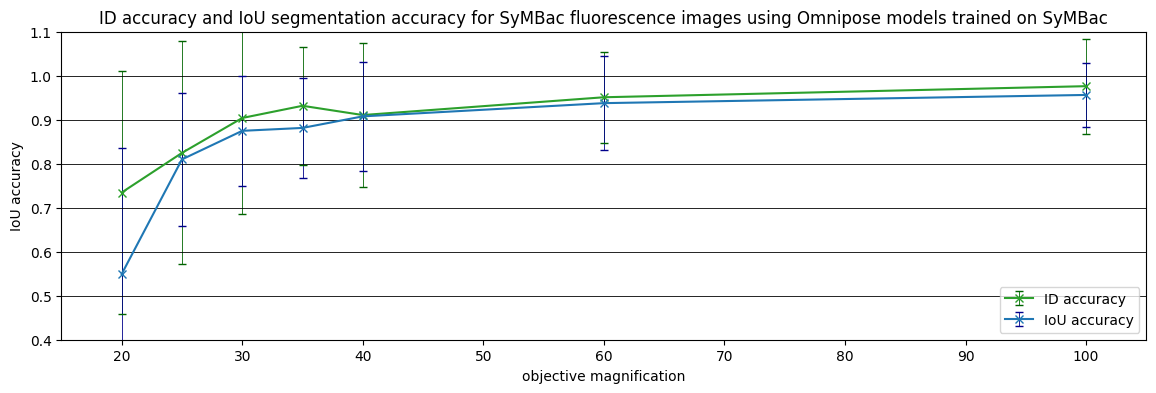

In [34]:
plt.rcParams["figure.figsize"] = [14,4]
plt.plot([15,105],[1,1],color='black',linewidth=0.6)
plt.plot([15,105],[0.8,0.8],color='black',linewidth=0.6)
plt.plot([15,105],[0.6,0.6],color='black',linewidth=0.6)
plt.plot([15,105],[0.4,0.4],color='black',linewidth=0.6)
plt.plot([15,105],[0.2,0.2],color='black',linewidth=0.6)
plt.plot([15,105],[0.9,0.9],color='black',linewidth=0.6)
plt.plot([15,105],[0.7,0.7],color='black',linewidth=0.6)
plt.plot([15,105],[0.5,0.5],color='black',linewidth=0.6)
plt.errorbar(xx,yy2,yerr2,ecolor='darkgreen',elinewidth=0.6,capsize=3,marker='x',label='ID accuracy',color='C2')
plt.errorbar(xx,yy1,yerr1,ecolor='darkblue',elinewidth=0.6,capsize=3,marker='x',label='IoU accuracy')
plt.title("ID accuracy and IoU segmentation accuracy for SyMBac fluorescence images using Omnipose models trained on SyMBac")
plt.xlabel("objective magnification")
plt.ylabel("IoU accuracy")
plt.xlim(15,105)
plt.ylim(0.4,1.1)
plt.legend()
plt.show()

# superres image losses

In [8]:
from srcnn import SRCNN
import torch
from interpolate import linear_interpolate
from interpolate import extend_background

In [9]:
model = SRCNN()
model.load_state_dict(torch.load("C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/superres/first_trial/SR_training/pmc_0.1638 output/model_ckpt.pth")['model_state_dict'])
model.eval()

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)

In [10]:
images_100x_dir = "C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/superres/first_trial/main_batch/pmc_0.0655/train/convolutions/"
images_60x_dir = "C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/superres/first_trial/main_batch/pmc_0.1092/train/convolutions/"
images_40x_dir = "C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/superres/first_trial/main_batch/pmc_0.1638/train/convolutions/"
# img = tifffile.imread("C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/superres/first_trial/main_batch/pmc_0.0655/train/convolutions/synth_00000_pmc_0.0655.tif")

In [11]:
hr_images = np.zeros((800,256,46))
linear_images = np.zeros((800,256,46))
sr_images = np.zeros((800,256,46))
small_images = np.zeros((800,102,18))
for i, files in enumerate(zip(os.listdir(images_100x_dir),os.listdir(images_40x_dir))):
    hr_image = tifffile.imread(images_100x_dir+files[0])//256
    lr_image = tifffile.imread(images_40x_dir+files[1])//256
    lr_image_linear = linear_interpolate(lr_image,hr_image.shape)
    input = torch.tensor((lr_image_linear/255).reshape(1,256,46),dtype=torch.float)
    with torch.no_grad():
        lr_image_sr = (np.array(model(input)).reshape(256,46)*255).astype(int)
    hr_images[i] = hr_image
    linear_images[i] = lr_image_linear
    sr_images[i] = lr_image_sr
    small_images[i] = lr_image

In [38]:
for i in range(256):
    for j in range(46):
        if input[0,i,j] != (lr_image_linear/255)[i,j]:
            print(i,j)

In [46]:
with torch.no_grad():
    print(torch.max(model(input)))

tensor(0.6306)


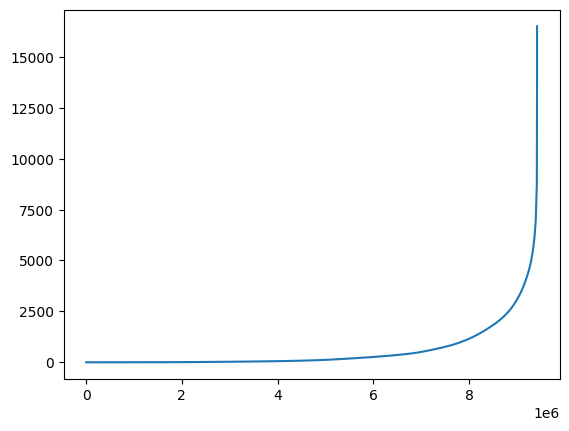

In [21]:
plt.plot(np.sort(((linear_images-hr_images)**2).flatten()))
plt.show()

In [23]:
linear_loss = (np.sum(np.sum((linear_images-hr_images)**2,axis=-1),axis=-1))
sr_loss = (np.sum(np.sum((sr_images-hr_images)**2,axis=-1),axis=-1))

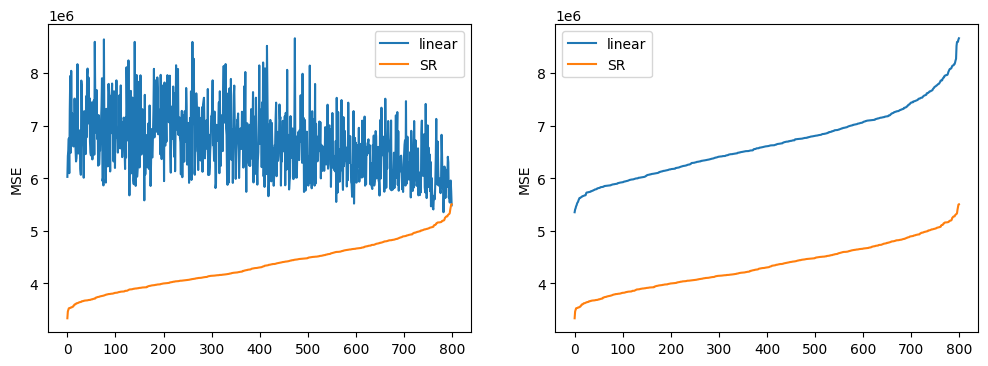

In [117]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(linear_loss[np.argsort(sr_loss)], label = "linear")
axs[0].plot(np.sort(sr_loss), label = "SR")
axs[0].set_ylabel("MSE")
axs[0].legend()
axs[1].plot(np.sort(linear_loss), label = "linear")
axs[1].plot(np.sort(sr_loss), label = "SR")
axs[1].set_ylabel("MSE")
axs[1].legend()
plt.show()

In [26]:
np.argmin(sr_loss)

650

In [34]:
np.where(linear_loss<sr_loss)

(array([726], dtype=int64),)

In [30]:
np.mean(linear_loss)/np.mean(sr_loss)

1.534733745974021

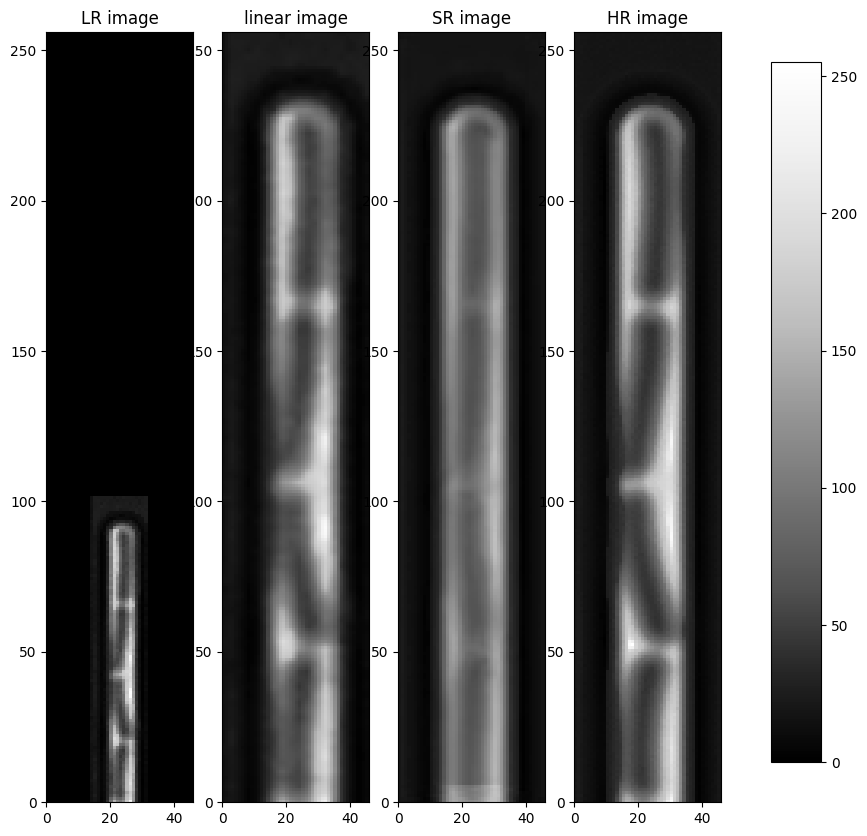

In [124]:
ind = 500
fig, axs = plt.subplots(1,4,figsize=(10,10))
im = axs[0].pcolor(extend_background(small_images[ind],(256,46))[::-1],cmap="Greys_r",vmin=0,vmax=255)
im = axs[1].pcolor(linear_images[ind][::-1],cmap="Greys_r",vmin=0,vmax=255)
im = axs[2].pcolor(sr_images[ind][::-1],cmap="Greys_r",vmin=0,vmax=255)
im = axs[3].pcolor(hr_images[ind][::-1],cmap="Greys_r",vmin=0,vmax=255)
axs[0].set_title("LR image")
axs[1].set_title("linear image")
axs[2].set_title("SR image")
axs[3].set_title("HR image")

fig.subplots_adjust(right=0.8,hspace=0.4)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()

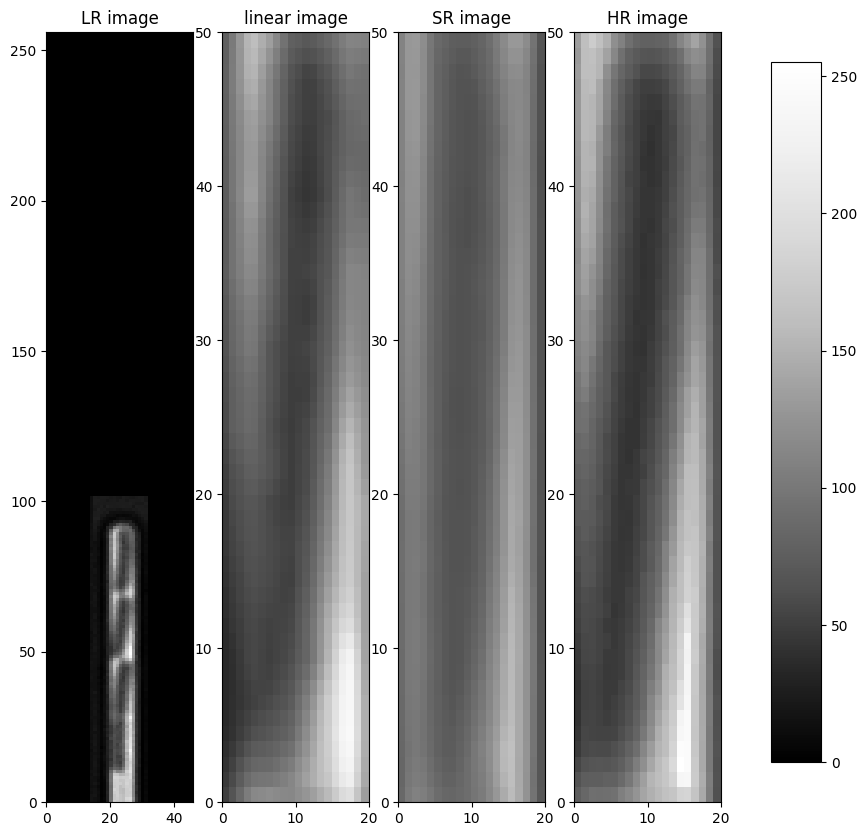

In [120]:
ind = 650
fig, axs = plt.subplots(1,4,figsize=(10,10))
im = axs[0].pcolor(extend_background(small_images[ind],(256,46))[::-1],cmap="Greys_r",vmin=0,vmax=255)
im = axs[1].pcolor(linear_images[ind][::-1][120:170,15:35],cmap="Greys_r",vmin=0,vmax=255)
im = axs[2].pcolor(sr_images[ind][::-1][120:170,15:35],cmap="Greys_r",vmin=0,vmax=255)
im = axs[3].pcolor(hr_images[ind][::-1][120:170,15:35],cmap="Greys_r",vmin=0,vmax=255)
axs[0].set_title("LR image")
axs[1].set_title("linear image")
axs[2].set_title("SR image")
axs[3].set_title("HR image")

fig.subplots_adjust(right=0.8,hspace=0.4)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()

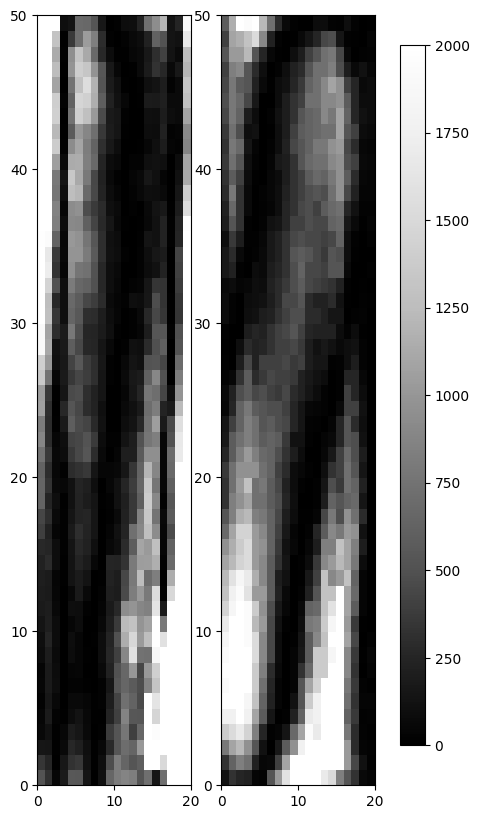

In [61]:
fig, axs = plt.subplots(1,2,figsize=(5,10))
ax0 = axs[0].pcolor(((linear_images[ind]-hr_images[ind])**2)[::-1][120:170,15:35],cmap="Greys_r",vmin=0,vmax=2000)
# plt.colorbar(ax0,ax=axs[0])
ax1 = axs[1].pcolor(((sr_images[ind]-hr_images[ind])**2)[::-1][120:170,15:35],cmap="Greys_r",vmin=0,vmax=2000)
# plt.colorbar(ax1,ax=axs[1])
fig.subplots_adjust(right=0.8,hspace=0.4)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax1, cax=cbar_ax)
plt.show()

In [48]:
np.mean(hr_images[0])

50.27063519021739

In [51]:
np.max(sr_images[0])

160.0

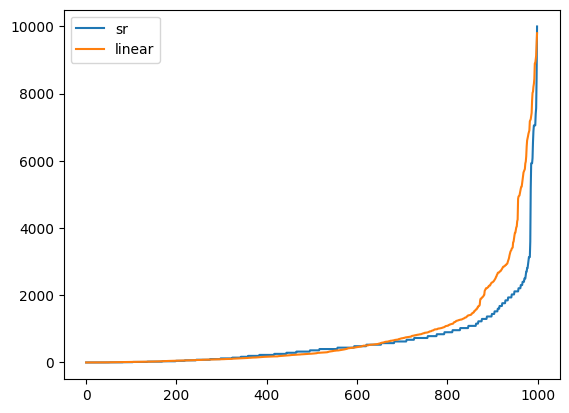

In [74]:
plt.plot(np.sort((((sr_images[ind]-hr_images[ind])[::-1][120:170,15:35])**2).flatten()),label="sr")
plt.plot(np.sort((((linear_images[ind]-hr_images[ind])[::-1][120:170,15:35])**2).flatten()),label="linear")
plt.legend()
plt.show()

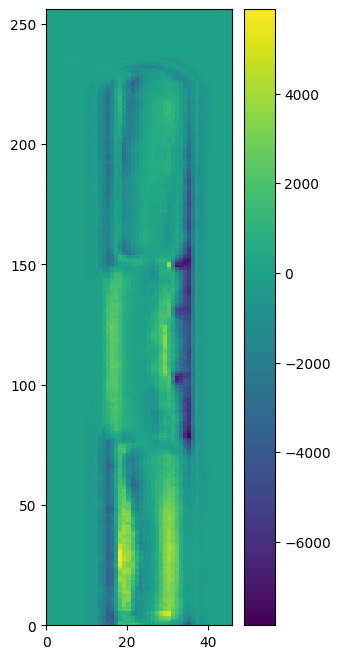

In [60]:
plt.rcParams["figure.figsize"] = [3,8]
plt.pcolor(((sr_images[0]-hr_images[0])**2-(linear_images[0]-hr_images[0])**2)[::-1])
plt.colorbar()
plt.show()

In [51]:
np.mean((sr_images/255-hr_images/255)**2)

0.005663737646826364